In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from imutils import paths


In [ ]:
image_paths = list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/DataSet/apptomato"))

In [ ]:
len(image_paths)

784

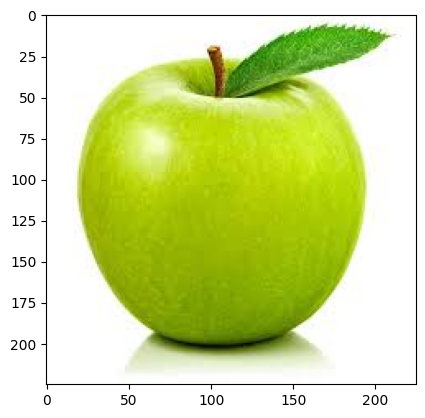

In [ ]:
im=cv2.imread(image_paths[210])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

In [ ]:
# Converting ALL Images into numpy array
image_num_data=list()
for i in range(len(image_paths)):
  image =cv2.imread(image_paths[i])
  # Let us resize the image.
  image=cv2.resize(src=image,dsize=(300,300),interpolation=cv2.INTER_LINEAR)
  image_num=np.array(image)
  image_flat=image_num. flatten()
  #print(image_flat.shape)
  image_num_data.append(image_flat)

In [ ]:
len(image_num_data)

784

In [ ]:
print(type(image_num_data))
print(image_num_data.shape)
print(image_num_data.ndim)

<class 'list'>


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
image_array=np.array(image_num_data)

In [ ]:
df=pd.DataFrame(image_array)
df.shape

(784, 270000)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,269990,269991,269992,269993,269994,269995,269996,269997,269998,269999
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242
2,244,252,251,244,252,251,241,248,247,238,...,236,233,233,233,230,230,230,230,230,230
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,44,167,223,44,167,223,29,146,203,15,...,17,174,118,17,174,118,17,174,118,17


## Video Data Preprocessing

In [ ]:
video_path = "/content/drive/MyDrive/Colab Notebooks/DataSet/shiva_lord.mp4"

In [ ]:
import cv2

video = cv2.VideoCapture(video_path)

count = 0
while True:
  ret, frame = video.read()
  if not ret:
    break
  count += 1

print("Total frames:", count)
video.release()

Total frames: 654


In [ ]:
os.makedirs("frames", exist_ok=True)

# Open the video file
video = cv2.VideoCapture(video_path)

count = 0

while count <= 654:
  ret, frame = video. read()

  # Stop if video ends or error occurs
  if not ret:
    print("Video ended or cannot read frame")
    break
  frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

  plt.imshow(frame_rgb)
  plt.axis('off')
  plt.show()

  #save frame
  cv2.imwrite(f"frames/frame_{count}.jpg", frame)
  count += 1

video.release()

In [ ]:

video = cv2.VideoCapture(video_path)
video_data = []
first_frame_shape =None

while True:
  ret, frame = video.read()

  if not ret:
    break
  if first_frame_shape is None:
    first_frame_shape = frame.shape
  elif frame. shape != first_frame_shape:
    frame = cv2.resize(frame, (first_frame_shape[1], first_frame_shape[0]))

  video_data.append(frame)

video_data = np.array(video_data)
print(video_data.shape)

(654, 848, 480, 3)


In [ ]:
video_data.ndim

4

In [ ]:

video = cv2.VideoCapture(video_path)
video_data = []
first_frame_shape = None
count=1
while count<=654:
    ret, frame = video.read()

    if not ret:
        break

    if first_frame_shape is None:
        first_frame_shape = frame.shape
    elif frame.shape != first_frame_shape:
        frame = cv2.resize(frame, (first_frame_shape[1], first_frame_shape[0]))

    frame_flattened = frame.reshape(-1)
    video_data.append(frame_flattened)
    count=count+1

video_data = np.array(video_data)
print(video_data.shape)

df = pd.DataFrame(video_data)
print(df.shape)

(654, 1221120)
(654, 1221120)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1221110,1221111,1221112,1221113,1221114,1221115,1221116,1221117,1221118,1221119
0,10,8,13,10,8,13,10,8,13,10,...,12,4,7,12,4,7,12,4,7,12
1,6,7,12,6,7,12,6,7,12,6,...,12,6,7,12,6,7,12,6,7,12
2,6,7,12,6,7,12,6,7,12,6,...,12,6,7,12,6,7,12,6,7,12
3,6,7,12,6,7,12,6,7,12,6,...,12,6,7,12,6,7,12,6,7,12
4,6,7,12,6,7,12,6,7,12,6,...,12,6,7,12,6,7,12,6,7,12
